In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import cv2

path = '/content/drive/MyDrive/archive (6)/Testing'
classes = {'no_tumor': 0, 'pituitary_tumor': 1, 'glioma_tumor':2,'meningioma_tumor':3}
X = []
Y = []

for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])


<Axes: >

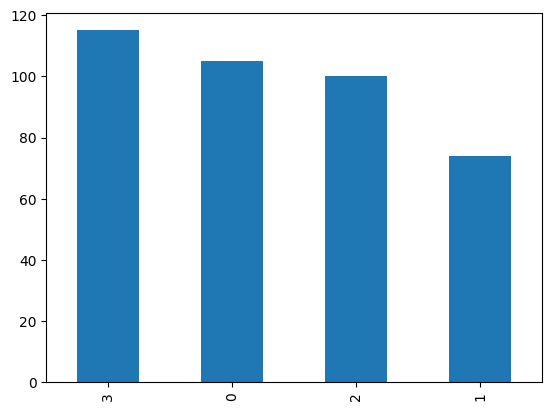

In [5]:

X = np.array(X)
Y = np.array(Y)
pd.Series(Y).value_counts().plot(kind="bar")

In [6]:
X_updated = X.reshape(len(X), -1)
X.shape, X_updated.shape

((394, 200, 200), (394, 40000))

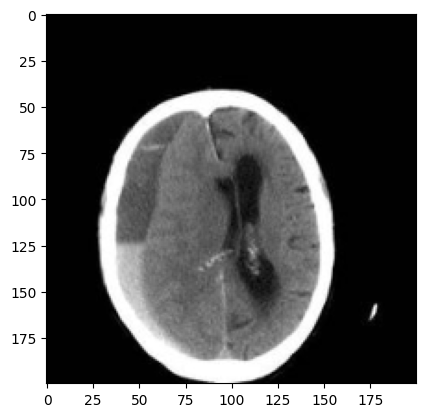

In [7]:
plt.imshow(X[0], cmap='gray')

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [9]:
xtrain.shape, xtest.shape

((315, 40000), (79, 40000))

In [10]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [11]:
from sklearn.svm import SVC
sv = SVC(kernel='linear')
sv.fit(xtrain, ytrain)

SVC(kernel='linear')

In [12]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.6329113924050633


In [13]:
pred = sv.predict(xtest)
misclassified=np.where(ytest!=pred)
misclassified

(array([ 1,  6,  8, 10, 14, 16, 17, 22, 27, 29, 30, 31, 33, 41, 42, 43, 46,
        47, 51, 54, 55, 58, 62, 64, 68, 69, 71, 72, 77]),)

In [ ]:
dec = {0:'No Tumor', 1:'Pituitary Tumor',2:'Glioma Tumor',3:'Meningioma Tumor'}

In [15]:
plt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/archive (6)/Testing'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

Fail to load image:meningioma_tumor


<Figure size 1200x800 with 0 Axes>

Fail to load image:pituitary_tumor
Fail to load image:glioma_tumor
Fail to load image:no_tumor


In [18]:
plt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/archive (6)/Testing'
for i in os.listdir(path)[:30]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(5,6,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f'Failed to Load Image:{i}')
    plt.show()

Failed to Load Image:meningioma_tumor


<Figure size 1200x800 with 0 Axes>

Failed to Load Image:pituitary_tumor
Failed to Load Image:glioma_tumor
Failed to Load Image:no_tumor


In [22]:
plt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/archive (6)/Testing'
for i in os.listdir(path)[:30]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(5,6,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f'Failed to Load Image:{i}')
    plt.show()

Failed to Load Image:meningioma_tumor


<Figure size 1200x800 with 0 Axes>

Failed to Load Image:pituitary_tumor
Failed to Load Image:glioma_tumor
Failed to Load Image:no_tumor


In [23]:
plt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/archive (6)/Testing'
for i in os.listdir(path)[:30]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(5,6,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f'Failed to Load Image:{i}')
    plt.show()

Failed to Load Image:meningioma_tumor


<Figure size 1200x800 with 0 Axes>

Failed to Load Image:pituitary_tumor
Failed to Load Image:glioma_tumor
Failed to Load Image:no_tumor


In [24]:
from sklearn.metrics import classification_report
classification=classification_report(ytest,pred)
print(classification)

              precision    recall  f1-score   support

           0       0.63      0.74      0.68        23
           1       0.92      0.92      0.92        13
           2       0.62      0.56      0.59        27
           3       0.40      0.38      0.39        16

    accuracy                           0.63        79
   macro avg       0.64      0.65      0.64        79
weighted avg       0.63      0.63      0.63        79



In [25]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(ytest,pred)
matrix

array([[17,  0,  4,  2],
       [ 0, 12,  0,  1],
       [ 6,  0, 15,  6],
       [ 4,  1,  5,  6]])

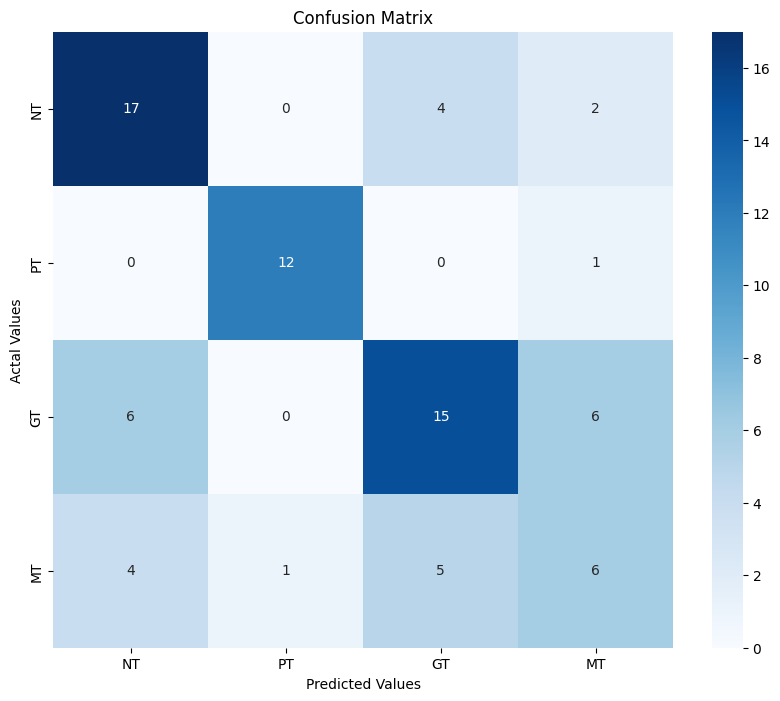

In [28]:
import seaborn as sns
cm_df = pd.DataFrame(matrix,
                     index = ['NT','PT','GT','MT'],
                     columns = ['NT','PT','GT','MT'])
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()